# Investigate revenue drivers

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
* Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,account

## Questions we want to answer while analysing this data set
>* Which top 5 directors produce the highest average revenue?
* Which top 5 directors produce the highest average revenue?
* Has actor or director an obvious higher influence on the revenue_adj?

<a id='wrangling'></a>
## Data Wrangling
### Load data 

In [66]:
# import python packages for the upcoming analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""Changing scientific numbers to numeric numbers"""
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

### Assessing  data 
Let's get a more detailed view on the data we wanna investigate. Especially the content of the columns cast, revenue_adj, directors, and genre are from interest regarding our research questions.

In [67]:
# Load your data and get an impression of the first rows
df = pd.read_csv('tmdb-movies.csv')
#df.head()

In [68]:
df.info(),
print('-------------')
print('Dataframe is represented in {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [69]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


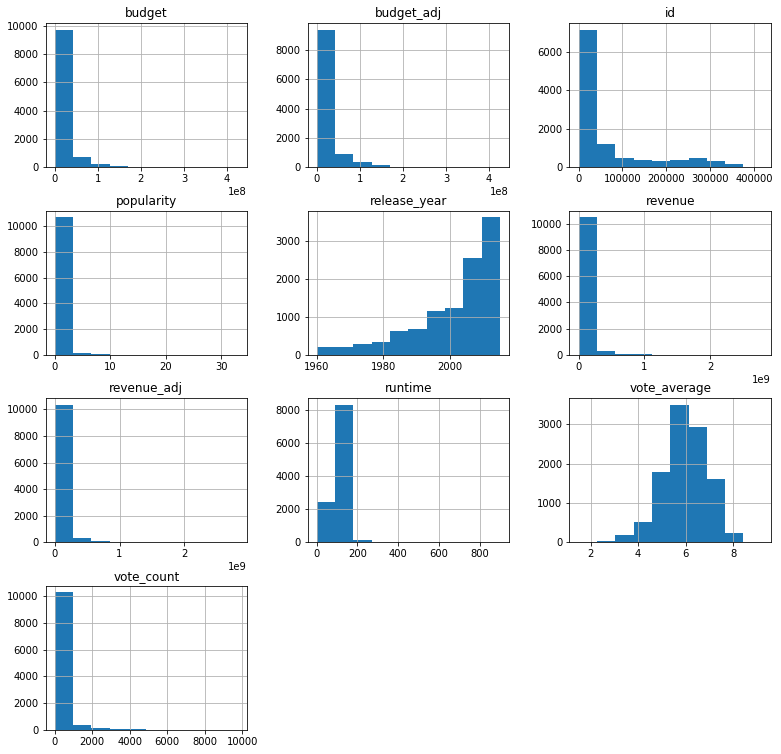

In [70]:
# The pandas plot function automatically ignores the object comlumns.
# Thats nice to get a first overview about the pure numbers
df.hist(figsize=(13,13));

In [71]:
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas 
# use iloc to ignore the data frame id as it makes noe sense 
corr = df.iloc[1:,1:].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1,0.56,0.66,0.14,0.82,0.22,0.091,0.53,0.61
budget,0.56,1,0.74,0.19,0.63,0.081,0.12,0.97,0.62
revenue,0.66,0.74,1,0.16,0.79,0.17,0.056,0.71,0.92
runtime,0.14,0.19,0.16,1,0.16,0.16,-0.12,0.22,0.18
vote_count,0.82,0.63,0.79,0.16,1,0.25,0.11,0.59,0.71
vote_average,0.22,0.081,0.17,0.16,0.25,1,-0.12,0.093,0.19
release_year,0.091,0.12,0.056,-0.12,0.11,-0.12,1,0.016,-0.067
budget_adj,0.53,0.97,0.71,0.22,0.59,0.093,0.016,1,0.65
revenue_adj,0.61,0.62,0.92,0.18,0.71,0.19,-0.067,0.65,1


In [72]:
# Confrim that the adjusted values are derived directly from the usual budget and revenue values.
# So we expect the same shape at least 
#df[df.revenue == 0].shape
df[df.revenue_adj == 0].shape

(6016, 21)

In [73]:
df.director.describe()

count           10822
unique           5067
top       Woody Allen
freq               45
Name: director, dtype: object

### Rough first Summary

It tells us that plain data frame has the follwing general attributes
* Range index 10866 entires
* Data columns 21 
* Data types are: float64 * 4, int64 * 6, object * 11

#### Main Aspects
There are different issues with this data set.
* Question related columns cast and revenue etc. contain multiple entries for one row. They are seperated by a "|".
* For revenue and budget show seems to have lot's of 0 values.
    * A quick check showed 6016 revenue_adj entries of value 0. This is more then 50% of the existing rows and can' be just dropped.
    
#### Minor Aspects
* Counts of movie per year rised almost exponential. That means our data set shows an bios for the newer age.
* The overall range for vote_average shows a gaussian normal distribution.
* The revenue and budget column histograms tells that there are some outlayer above 1 billion. The majority is way below.

#### Correlation Matrix
###### revenue and revenue_adj - by design 
* Crystal clear one can observe a high correlation between revenue and revenue_adj- This is expected anmd by design. No surprice but alomst a validation that the correlation matrix shows valid results :-).
###### Vote cound v.s. popularity 0.82
* We can see a high correlation between vote cound and popolation of 0.82. This don't say which of both features are the root cause. Nevertheless it can be motivating toi take a closer look on it in future to identify the causality.
###### Vote cound v.s. revenue 0.72
* We can clearly see a high correlation between vote_count and revenue.  


### Resulting Cleaning steps

1. Sepreate the multiple entries in the columns
2. Delete unneccessary columns
3. Manage the NaN rows - make two sets
* Replace rows in `revenue_adj` of value 0.0 with the median for this.
4. Common Steps 
* Check for duplicates
* Check types


A short check of the kaggle forum offers that there are planty of different genres:
"Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Documentary", "Drama", "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi", "Short", "Sport", "Thriller", "War", "Western"
These are 23 genres.


#### Seperate the mutliple entries per column for `cast`,  `director`, and  `genres`.
The question we wanna answer require the use of `cast`,`directors`, and  `revenue` column. These two columns keep rows with several values will be seperated in single columns containing only one of the values each.

In [74]:
# Seperate the mutliple entries in one row and define a column for each and evey entry
df_cast     = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_director = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_genres   = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))

# Add seperated columns to the original dataframe
df = df.join([df_cast, df_director, df_genres])

In [75]:
# The questions point to the directors,cast,year of release, and revenue.
# This is why we drop the following:
## cast - director - genres - imdb_id - homepage - tagline - overview - budget -revenue - original_title - budget_adj - keywords - runtime - production_companies - vote_count - vote_average
df.drop(['cast', 'director', 'genres','popularity','imdb_id','homepage','tagline','overview','budget','revenue','original_title','budget_adj','keywords','runtime','production_companies','vote_count','vote_average'],axis = 1, inplace = True)
## We also drop the majority of the directors again because they don't add value.
## The major director is mentioned as first in the original string.
df.drop(df.loc[:,'director_2':'director_36'],axis=1,inplace = True)

In [76]:
# rename the director_1 row to director again
df.rename(columns={"director_1": "director"},inplace = True)


#### Check director and cast for the rows where revenue equals zero
Why we are doing this? Because there can be two scenarios
1. the 6000 rows that have 0 revenue have weird data for other columns too like "No/unknown director", "no/unknown cast", etc. It would make no sense trying to deal with the 0s. The corresponding director/cast variable have no information. So it would be better to drop them. Then look on the remaining 4000 that have sensible values for both revenue and director or cast
2. the 6000 rows that have 0s revenue have seemingly okay values for director and cast. Then we would not like to drop them.

In [77]:
df[df.revenue_adj == 0].director.value_counts()

Woody Allen               24
Uwe Boll                  13
Gerald Thomas             12
Martin Scorsese           12
Paul Hoen                 10
Stuart Gillard            10
Norman Jewison             9
Roger Corman               9
Sean McNamara              9
Robert Altman              9
John Huston                9
Roel ReinÃ©                9
Mike Nichols               9
Terence Fisher             8
Michael Winterbottom       8
Steve Miner                8
Brian Trenchard-Smith      8
Sidney Lumet               8
Steve Rash                 8
Mikael Salomon             8
Michael Ritchie            8
Robert Stevenson           8
Robert Harmon              8
Tobe Hooper                8
Lawrence Kasdan            8
Russell Mulcahy            8
Robert Vince               8
Jim Jarmusch               8
Clint Eastwood             8
Charles Grosvenor          8
                          ..
AndrÃ© Pellenz             1
Billy O'Brien              1
Marina Zenovich            1
Kelly Dolen   

Case two is true. This means you we can't easily just drop 60% of the dataset. We would drop important information on director/cast and other variables. For simplification we will do in as one variant.
    
We fill in the median revenue.

In [78]:
# The first case 
## drop all revenue_adj equals zero
df_dropped = df.drop( df[df['revenue_adj'] == 0.00].index)
# Since we expect 6016 0.00 values, we expect a cut down to 4850...
df_dropped.shape
# the new shape is (4850, 8) we safe this as a separated dataset declared as dropped


(4850, 15)

In [79]:
# Lets get a quick overview about the new characteristic of the revenue columns. 
df_dropped.revenue_adj.describe()

count         4850.00
mean     115077354.87
std      198841916.05
min              2.37
25%       10462622.84
50%       43927485.54
75%      131564380.46
max     2827123750.41
Name: revenue_adj, dtype: float64

In [80]:
## Instead of dropping them, we fill the zeros with the median
# get the median for the revenue_adj but cut out the very less extraordinary outlayers
value = df_dropped.revenue_adj.median()
df_median = df.copy()
df_median['revenue_adj'].replace(0.00, value,inplace=True)
#Check whether the replace worked
#df_median.revenue_adj.value_counts()

#### Common steps

In [81]:
df_median.head()


,id,release_date,release_year,revenue_adj,cast_1,cast_2,cast_3,cast_4,cast_5,director,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,6/9/15,2015,1392445892.52,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,Action,Adventure,Science Fiction,Thriller,None
1,76341,5/13/15,2015,348161292.49,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,George Miller,Action,Adventure,Science Fiction,Thriller,None
2,262500,3/18/15,2015,271619025.41,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Robert Schwentke,Adventure,Science Fiction,Thriller,None,None
3,140607,12/15/15,2015,1902723129.80,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,J.J. Abrams,Action,Adventure,Science Fiction,Fantasy,None
4,168259,4/1/15,2015,1385748801.47,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,James Wan,Action,Crime,Thriller,None,None


In [82]:
#check for duplicated rows in the remaining data set
df.duplicated().sum()
# The whole data set shows one single duplicate. We ignore this, since its unsignificant.

1

In [83]:
# Check fo nan
df.isnull().sum()

id                  0
release_date        0
release_year        0
revenue_adj         0
cast_1             76
cast_2            220
cast_3            310
cast_4            419
cast_5            732
director           44
genres_1           23
genres_2         2351
genres_3         5787
genres_4         8885
genres_5        10324
dtype: int64

#### Accessing and Cleaning Summary
Data looks prepared for the analysis
* unecessary columns are dropped
* no duplicates have been found
* Columns which keep multiple values have been seperated and data types look ready for analysis. 

<a id='eda'></a>
## Exploratory Data Analysis
Since all question are related two a certain level of revenue, we will define this revenue classification first.

### Research Question 1: Which top 5 directors produce the highest average revenuea_adj?
* Filter the director cloumns for unique counts 
* Only consider the directors and actors which showing up mutliple times. This is for shaping some historical evidence.

In [84]:
# cout how often a single director occurs in the data set 
frequent_directors = df_median.director.value_counts()
# filter out the directors which has produced less the 10 movies. This shall ensure that we gain historical evidence 
frequent_directors = frequent_directors[frequent_directors > 10]
frequent_directors.shape

(91,)

In [85]:
avg_per_directors = {} # Create a dictionary for the folling for loop
for index, value in frequent_directors.items():
    # create a list with the overall revenue_adj mean of each director 
    avg_per_directors.__setitem__(index, (df_median[df_median['director'] == index]['revenue_adj'].mean()))  
    
# Using the pandass sorted() to reorder the dictionary by value from highest to lowest and convert it into a doct again 
avg_per_directors = dict(sorted(avg_per_directors.items(), key = lambda x: x[1],reverse=True))
avg_per_directors # print the dict

{'James Cameron': 678091210.4565568,
 'Peter Jackson': 546746368.27439928,
 'Steven Spielberg': 527251784.74851048,
 'Michael Bay': 496424723.47636873,
 'Roland Emmerich': 378621451.32410949,
 'Chris Columbus': 370138014.08054543,
 'Robert Zemeckis': 337853130.61217576,
 'Sam Raimi': 269392270.41514832,
 'John Lasseter': 267725066.09717524,
 'Tim Burton': 239596181.91585422,
 'Richard Donner': 215123416.45599201,
 'William Friedkin': 214177002.97434676,
 'Ron Howard': 213763882.90733573,
 'Shawn Levy': 212611644.14324334,
 'Tony Scott': 197278394.59782138,
 'Jay Roach': 196958710.71943572,
 'Ivan Reitman': 186472701.14384034,
 'Ridley Scott': 185369281.03681996,
 'Mike Newell': 179011881.19395703,
 'Francis Ford Coppola': 167081087.22812733,
 'Sydney Pollack': 164600763.12587005,
 'Quentin Tarantino': 160670999.28261834,
 'Garry Marshall': 159827405.9454636,
 'Dennis Dugan': 141196965.10434377,
 'Mel Brooks': 131313058.81264986,
 'Mike Nichols': 129186088.38824746,
 'John G. Avildsen':

In [86]:
df_avg_per_directors = pd.DataFrame.from_dict(avg_per_directors,orient='index',columns=['revenue_adj'])
df_avg_per_directors.head()

,revenue_adj
James Cameron,678091210.46
Peter Jackson,546746368.27
Steven Spielberg,527251784.75
Michael Bay,496424723.48
Roland Emmerich,378621451.32


In [87]:
# Defines a column with classified level for a category
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.37,10465848.09,43956661.16,100000000,2827123750.41]
# Labels for the four revenue class groups
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
# Creates revenue class column
df_avg_per_directors['revenue_class'] = pd.cut(df_avg_per_directors['revenue_adj'], bin_edges, labels=bin_names)
df_avg_per_directors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, James Cameron to Kevin Smith
Data columns (total 2 columns):
revenue_adj      91 non-null float64
revenue_class    91 non-null category
dtypes: category(1), float64(1)
memory usage: 1.7+ KB


In [88]:
# CReate a sub data frame contasining only column of revenue_adj class high
df_directors_high_revenue = df_avg_per_directors.query('revenue_class == "high"')
# Filter the directors dataset for the 5 top
df_directors_high_revenue_top_five = df_directors_high_revenue.iloc[0:5]
df_directors_high_revenue_top_five.head()

,revenue_adj,revenue_class
James Cameron,678091210.46,high
Peter Jackson,546746368.27,high
Steven Spielberg,527251784.75,high
Michael Bay,496424723.48,high
Roland Emmerich,378621451.32,high


In [89]:
# Mean all directors more then 10 movies
df_directors_high_revenue.mean()

revenue_adj   220412627.52
dtype: float64

In [90]:
df_directors_high_revenue_top_five.revenue_adj.mean()

525427107.65598899

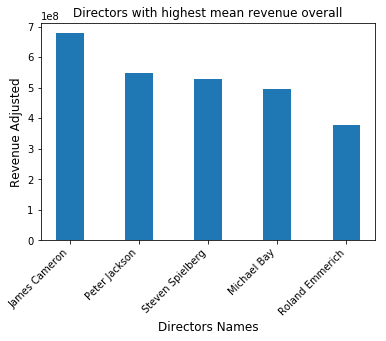

In [91]:
# Create a bar plot for the most reliable director over renvenue 
# define data to plot 
x = [1,3,5,7,9]
heights = [678091210.46,546746368.27,527251784.75,496424723.48,378621451.32]

labels = ['James Cameron','Peter Jackson','Steven Spielberg','Michael Bay','Roland Emmerich']

#create a new figure and plot 
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.bar(x, heights, tick_label=labels) #plot
plt.title('Directors with highest mean revenue overall')
plt.xlabel('Directors Names', fontsize=12)
plt.ylabel('Revenue Adjusted', fontsize=12)
ax.set_xticklabels(labels, rotation = 45, ha="right")
fig.savefig('top5_directors_over_revenue_adj.png', dpi=300, format='png', bbox_inches='tight')

### Conclusion Question 1 Which top 5 directors produce the highest average revenue?

#### Top 5 Directors
The top five performer amid the directors which have at least produced 10 movies and accomplished an average revenue_adj are from top to bottom: 

* James Cameron
* Peter Jackson
* Steven Spielberg
* Michael Bay
* Roland Emmerich

Acroos the top five directors the mean revenue is 525427107 Dollar!

This answer leaves an interesting guess. One could assume that choosing on of the directors above could guarantees an high revenue.
#### Limitation:
1. The generation of the List considers only directors which has produced more than 10 movies. This criteria is set to ensure a bit historical evidence and to sort out mayflier. In the same time there could be directors in the data frame who produced an higher average revenue but less then 10 movies. This is accepted, since a clear criteria for calculating a comparable mean value is worth it.
2. The assumption that by choosing the top five directors one will have a guarantee for high revenue is missleading. Since the same directors could have produced 20 movies and 10 of those show low revenue. This low revenue in our case would be hided by the mean calculation.

Finally. Historically the five actors listed above produced based the highest mean revenue in compare to every other actor which have more than 10 movies.


### Research Question 2: Which top 5 actors produce the highest average revenuea_adj?


In [92]:
df_median['revenue_class'] = pd.cut(df_median['revenue_adj'], bin_edges, labels=bin_names)

In [93]:
# Selecting a subset of the df_median data frame
# We select cast1 to 5, revenue
df_all_actors_and_high_revenue = df_median.loc[:,['cast_1','cast_2','cast_3','cast_4','cast_5','revenue_adj']]
# turns out we have not a 10866 rows × 6 columns df
df_all_actors_and_high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
cast_1         10790 non-null object
cast_2         10646 non-null object
cast_3         10556 non-null object
cast_4         10447 non-null object
cast_5         10134 non-null object
revenue_adj    10866 non-null float64
dtypes: float64(1), object(5)
memory usage: 509.4+ KB


In [94]:
# Staple all different cast caloumns for having one single actor column. Makes handling easier in the upcoming steps.
df_frequent_actors_and_high_revenue = pd.DataFrame(df_all_actors_and_high_revenue.iloc[:,0:-1].stack().value_counts())
df_frequent_actors_and_high_revenue = df_frequent_actors_and_high_revenue[df_frequent_actors_and_high_revenue > 10]
df_frequent_actors_and_high_revenue.reset_index(inplace=True)
df_frequent_actors_and_high_revenue.rename(columns={'index':'Actor',0:'MovieActCount'},inplace = True)

In [95]:
df_frequent_actors_and_high_revenue = df_frequent_actors_and_high_revenue.dropna()
df_frequent_actors_and_high_revenue.head()

,Actor,MovieActCount
0,Robert De Niro,72.00
1,Samuel L. Jackson,71.00
2,Bruce Willis,62.00
3,Nicolas Cage,61.00
4,Michael Caine,53.00


In [96]:
#Create new column for mean revenue and fill it initially with zero
df_frequent_actors_and_high_revenue['revenue_mean'] = 0
df_frequent_actors_and_high_revenue.head()

,Actor,MovieActCount,revenue_mean
0,Robert De Niro,72.00,0
1,Samuel L. Jackson,71.00,0
2,Bruce Willis,62.00,0
3,Nicolas Cage,61.00,0
4,Michael Caine,53.00,0


In [97]:
# Calculate the mean revenue across all actor
def mean_rev(actor):
    '''Function that calculates the average revenue for the movie satrring the actor given as input'''
    mean_rev = df_all_actors_and_high_revenue[(df_all_actors_and_high_revenue['cast_1'] == actor)|(df_all_actors_and_high_revenue['cast_2'] == actor)|(df_all_actors_and_high_revenue['cast_3'] == actor)|(df_all_actors_and_high_revenue['cast_4'] == actor)|(df_all_actors_and_high_revenue['cast_5'] == actor)].revenue_adj.mean()
    return mean_rev

In [98]:
# Calculate the mean revenue per actor
df_frequent_actors_and_high_revenue['revenue_mean'] = df_frequent_actors_and_high_revenue['Actor'].apply(mean_rev)

In [99]:
# Sort the data frame base on the mean revenue from top to bottom 
df_frequent_actors_and_high_revenue =df_frequent_actors_and_high_revenue.sort_values(by='revenue_mean', ascending=False, na_position = 'last')

In [103]:
#Mean all actors more then 10 movies 
df_frequent_actors_and_high_revenue.head(10)

,Actor,MovieActCount,revenue_mean
628,Emma Watson,14.00,632161777.65
738,Carrie Fisher,13.00,604689053.37
542,Daniel Radcliffe,16.00,543174511.07
529,Rupert Grint,16.00,533381252.75
484,Orlando Bloom,17.00,450035270.44
418,Mark Hamill,18.00,440308754.08
296,Ian McKellen,22.00,406131259.38
576,Julie Andrews,15.00,386634249.08
302,Will Smith,22.00,357431709.83
30,Harrison Ford,42.00,355882096.64


In [104]:
df_frequent_actors_top_five_revenue=df_frequent_actors_and_high_revenue.iloc[0:5]
df_frequent_actors_top_five_revenue.head()

,Actor,MovieActCount,revenue_mean
628,Emma Watson,14.00,632161777.65
738,Carrie Fisher,13.00,604689053.37
542,Daniel Radcliffe,16.00,543174511.07
529,Rupert Grint,16.00,533381252.75
484,Orlando Bloom,17.00,450035270.44


[Text(0,0,'Emma Watson'),
 Text(0,0,'Carrie Fisher'),
 Text(0,0,'Daniel Radcliffe'),
 Text(0,0,'Rupert Grint'),
 Text(0,0,'Orlando Bloom')]

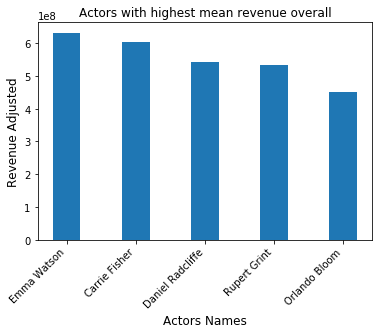

In [105]:
#get data 
actors = [1,3,5,7,9]
revenue = df_frequent_actors_top_five_revenue.iloc[0:5,2].tolist()
labels = ['Emma Watson','Carrie Fisher','Daniel Radcliffe','Rupert Grint','Orlando Bloom']

#create a new figure and plot 
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.bar(actors, revenue, tick_label=labels) #plot
plt.title('Actors with highest mean revenue overall')
plt.xlabel('Actors Names', fontsize=12)
plt.ylabel('Revenue Adjusted', fontsize=12)
ax.set_xticklabels(labels, rotation = 45, ha="right")

### Conclusion Question 2

#### Top 5 Actors
The top five performer amid the actors which have at least acted in 10 movies and accomplished an average revenue_adj are from top to bottom: 

* Emma Watson	
* Carrie Fisher	
* Daniel Radcliffe
* Rupert Grint
* Orlando Bloom	

Acroos the top five directors the mean revenue is 552688373 Dollar!

This answer leaves an interesting guess. One could assume that choosing on of the actors above could guarantees an high revenue.
#### Limitation:
The limitations ragarding the chosen top five actors are the same like the ones for the directors.

Finally. Historically the five actors listed above produced based the highest mean revenue in compare to every other actor which have more than 10 movies.

### Research Question 3: Has one of those categories an obvious higher influence on the revenue_adj?

In [106]:
# Prepare dataframe for the cancatenate method

df_directors_high_revenue_top_five.reset_index(inplace=True)
df_directors = df_directors_high_revenue_top_five.copy()

In [107]:
df_directors_high_revenue_top_five.head()

,index,revenue_adj,revenue_class
0,James Cameron,678091210.46,high
1,Peter Jackson,546746368.27,high
2,Steven Spielberg,527251784.75,high
3,Michael Bay,496424723.48,high
4,Roland Emmerich,378621451.32,high


In [108]:
df_directors_high_revenue_top_five.head()

,index,revenue_adj,revenue_class
0,James Cameron,678091210.46,high
1,Peter Jackson,546746368.27,high
2,Steven Spielberg,527251784.75,high
3,Michael Bay,496424723.48,high
4,Roland Emmerich,378621451.32,high


In [109]:
# Prepare dataframe for the cancatenate method
df_frequent_actors_top_five_revenue.drop(['MovieActCount'],axis = 1, inplace = True)
df_frequent_actors_top_five_revenue.rename(columns={'revenue_mean':'revenue_adj'},inplace = True)
df_actors = df_frequent_actors_top_five_revenue.copy()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [110]:
df_frequent_actors_and_high_revenue.head()

,Actor,MovieActCount,revenue_mean
628,Emma Watson,14.00,632161777.65
738,Carrie Fisher,13.00,604689053.37
542,Daniel Radcliffe,16.00,543174511.07
529,Rupert Grint,16.00,533381252.75
484,Orlando Bloom,17.00,450035270.44


In [111]:
#Add a column for the category of the persons
df_actors['category'] = 'actor'
df_directors['category'] = 'director'

In [112]:
# standardize the columns name for the persons
df_actors.rename(columns={'Actor':'Name'},inplace = True)
df_directors.rename(columns={'index':'Name'},inplace = True)

In [113]:
# Check the prepared data sets
df_directors.head()

,Name,revenue_adj,revenue_class,category
0,James Cameron,678091210.46,high,director
1,Peter Jackson,546746368.27,high,director
2,Steven Spielberg,527251784.75,high,director
3,Michael Bay,496424723.48,high,director
4,Roland Emmerich,378621451.32,high,director


In [114]:
df_actors.head()

,Name,revenue_adj,category
628,Emma Watson,632161777.65,actor
738,Carrie Fisher,604689053.37,actor
542,Daniel Radcliffe,543174511.07,actor
529,Rupert Grint,533381252.75,actor
484,Orlando Bloom,450035270.44,actor


In [115]:
# Create a new concatenate datsframe for plotting 
new_concate_dataset = pd.concat([df_actors,df_directors],axis=0)
new_concate_dataset.sort_values(['revenue_adj'],ascending = False,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


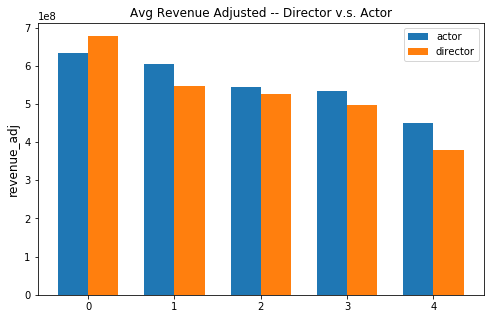

In [116]:
#get data
names_act = new_concate_dataset[new_concate_dataset['category']=='actor']['Name'].tolist()
x = np.arange(len(names_act))
revenue_act = new_concate_dataset[new_concate_dataset['category']=='actor']['revenue_adj'].tolist()
revenue_director = new_concate_dataset[new_concate_dataset['category']=='director']['revenue_adj'].tolist()
width = 0.35
# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x- width/2,revenue_act,width,label='actor')
ax.bar(x+ width/2, revenue_director,width, label='director')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('revenue_adj',fontsize=12)
ax.set_title('Avg Revenue Adjusted -- Director v.s. Actor')
ax.legend()

plt.show()

### Challenge the Assumption that actors produce more average revenue

In [117]:
# Take the avergae director dataset and prepare it for 
df_avg_per_directors.reset_index(inplace=True)
df_avg_per_directors.drop(['revenue_class'],axis=1,inplace=True)
df_avg_per_directors.rename(columns={'index':'Director'},inplace = True)


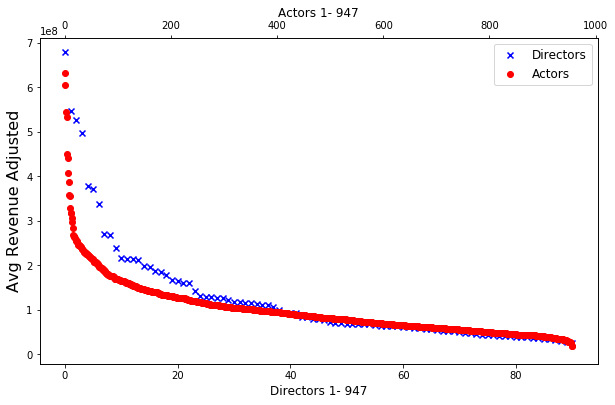

In [118]:
# Create figure and define size 
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111) 
ax2 = ax1.twiny() # Create second axis 

# Gather data and prepare for the plot 
x_one = np.arange(0,len(df_avg_per_directors.index)).tolist()
x_two = np.arange(0,len(df_frequent_actors_and_high_revenue.index)).tolist()
y_one = df_avg_per_directors['revenue_adj'].tolist()
y_two = df_frequent_actors_and_high_revenue['revenue_mean'].tolist()

# PLot the data and define color and marker for Actor and Director
plot_one = ax1.scatter(x_one, y_one, c='b', marker="x")
plot_two = ax2.scatter(x_two, y_two, c='r', marker="o")

# Give every axis a label
ax1.set_ylabel("Avg Revenue Adjusted",fontsize=16)
ax1.set_xlabel("Directors 1- 947",fontsize=12)
ax2.set_xlabel("Actors 1- 947",fontsize=12)

# set the legend in the upper right of the figure 
ax1.legend([plot_one,plot_two],['Directors', 'Actors'],fontsize=12)
plt.show()

### Conclusion Question 3

#### Does the top 5 directors or actor show an obvious higher mean revenue
The top five performer amid the actors and directors which have at least acted or directed in 10 movies and accomplished show almost similar mean revenues. The plot shows a somehow slidely higher revenue across the actors in compare to the director. Nevertheless, the top director shows higher revenue than the top actor.

A rough guess would be that the actors in average produce an higher revenue than the directors.

##### Challenge the Assumption that actors produce more average revenue 
For getting an overview about the average revenue adjusted for two filtered datasets:
* Actors that acted in more then 10 movies
* Directors that produced more then 10 movie 

The plot shows the revenue adjusted acroos all revenue classes. From "very low" up to "high". Even after having the full overview, there is no clear picture. Whether the director ot the actor produce an significant higher revenue. It seems that there is a slidely higher average revenue adjusted for the directors for the area of "higher" revenue (>1,5 e^8). Due to the fact that the amount of directors is 1/10 of the amount of actors, this assumption remains blurry.  

#### Limitation:
Since the plot only shows a subset across the top five actors with more then 10 movies it is difficult to make a clear statement. The question whether actors or directors produce higher revenue can't be answered with a high eveidence due to the filtering of the data. However it can be answered for the top performer, at least.

To answer this quesation a new dataset could be created. This would need to have the roughly same amount of actors an directors as well as the same filtering regarding the years of production. Even with the revenue adjusted it became obvious that the movie business durign the recent time made much more money.
